### Random Forest Algorithm 
* The Random Forest algoritm is an ensamble learning method primarily used for classification and regression tasks. 
* It operares by constructing multiple decision trees during training and outputs the class(classification) or mean(regression) of the individual trees.

### Key concepts
* Ensamble Learning
* Decision Trees
* Bagging (Bootstrap Aggregating)
* Random Subspace Method

## How Random Forest Works
1. Training Phase:
    * Multiple decision trees are trained independently using different bootstrap samples of the training data.
    * For each node in a tree, a random subset of features is selected, and the best split is chosen based on these features.

2. Prediction Phase:
    * For classification, each tree in the forest predicts the class for a given input, and the final prediction is the mode (most frequent class) of all the tree predictions.
    * For regression, each tree provides a prediction, and the final output is the average of all the tree predictions.

In [2]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
for i in range(2):
    plt.matshow(digits.images[i])

In [10]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [11]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [18]:
from sklearn.model_selection import train_test_split
df_n = df.drop('target', axis='columns')
X_train, X_test, y_train, y_test = train_test_split(df_n, df['target'], test_size=0.2)
len(X_test)

360

In [19]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
model.score(X_test, y_test)

0.9694444444444444

In [27]:
y_predicted = model.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[43,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 26,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 36,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 38,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 46,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  2, 30]])

Text(95.72222222222221, 0.5, 'Truth')

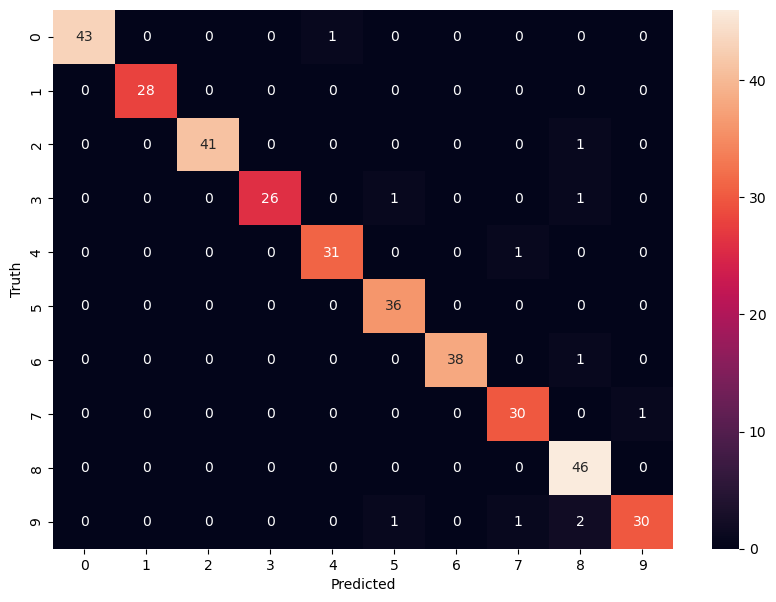

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')